In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.preprocessing import LabelEncoder , StandardScaler


df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (2)\Expanded_data_with_more_features.csv")

In [132]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [133]:
df.shape

(30641, 15)

In [134]:
print(df.isnull().sum())

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [135]:
df.duplicated().sum()

np.int64(0)

In [136]:
df['EthnicGroup'].mode()

0    group C
Name: EthnicGroup, dtype: object

In [137]:
df['ParentEduc'].mode()

0    some college
Name: ParentEduc, dtype: object

In [138]:
df['TestPrep'].mode()

0    none
Name: TestPrep, dtype: object

In [139]:
df['ParentMaritalStatus'].mode()

0    married
Name: ParentMaritalStatus, dtype: object

In [140]:
df['PracticeSport'].mode()

0    sometimes
Name: PracticeSport, dtype: object

In [141]:
df['IsFirstChild'].mode()

0    yes
Name: IsFirstChild, dtype: object

In [142]:
df['TransportMeans'].mode()

0    school_bus
Name: TransportMeans, dtype: object

In [143]:
df['WklyStudyHours'].mode()

0    5 - 10
Name: WklyStudyHours, dtype: object

In [144]:
df.fillna(
    {
        'EthnicGroup': "group C",
        'ParentEduc': "some college",
        'ParentMaritalStatus': "married",
         'TestPrep': "none",
         'PracticeSport': "sometimes",
         'IsFirstChild': "yes",
         'TransportMeans': "school_bus",
         'WklyStudyHours': "5 - 10",
    }
, inplace=True)

In [145]:
df['NrSiblings'] = df['NrSiblings'].fillna(df['NrSiblings'].mean())

In [146]:
print(df.isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


In [147]:
df['NrSiblings'] = df['NrSiblings'].astype(int)

In [148]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [149]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['EthnicGroup'] = label_encoder.fit_transform(df['EthnicGroup'].astype(str))
df['ParentEduc'] = label_encoder.fit_transform(df['ParentEduc'].astype(str))
df['LunchType'] = label_encoder.fit_transform(df['LunchType'].astype(str))
df['TestPrep'] = label_encoder.fit_transform(df['TestPrep'].astype(str))
df['ParentMaritalStatus'] = label_encoder.fit_transform(df['ParentMaritalStatus'].astype(str))
df['PracticeSport'] = label_encoder.fit_transform(df['PracticeSport'].astype(str))
df['IsFirstChild'] = label_encoder.fit_transform(df['IsFirstChild'].astype(str))
df['TransportMeans'] = label_encoder.fit_transform(df['TransportMeans'].astype(str))
df['WklyStudyHours'] = label_encoder.fit_transform(df['WklyStudyHours'].astype(str))

In [150]:
X = df.drop(['MathScore'], axis=1)
y = df['MathScore']

In [151]:
Best_Test_Size = 0
Best_MSE = 100
for i in range(20 , 91):
    t_s = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = t_s , random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    if mean_squared_error(y_test, y_pred) < Best_MSE:
        Best_MSE = mean_squared_error(y_test, y_pred)
        Best_Test_Size = t_s
print(Best_MSE , " " , Best_Test_Size)

31.95354760980004   0.45


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state=0)

In [153]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [154]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 31.95354760980004
Mean Absolute Error: 4.522404623484056
R-squared: 0.8652170218427234


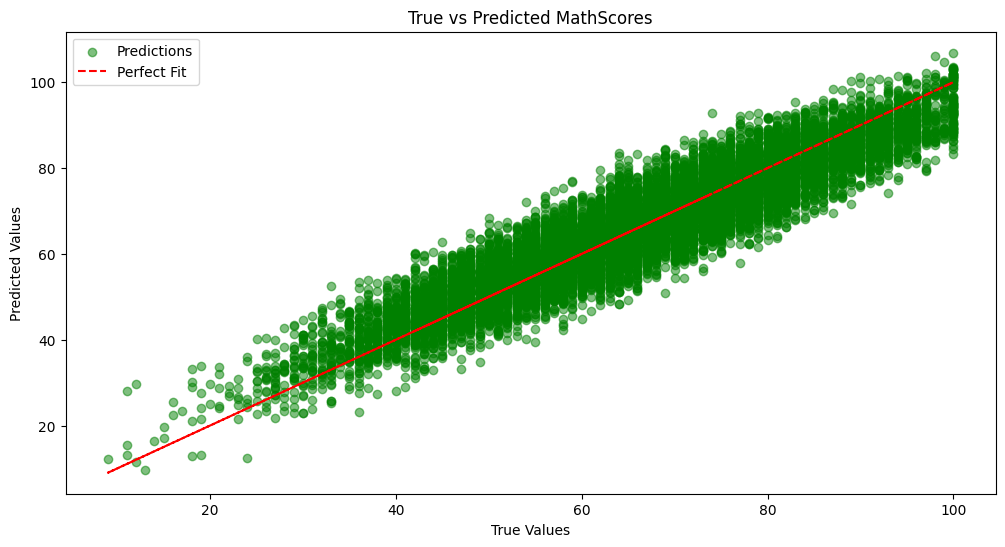

In [155]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted MathScores")
plt.legend()
plt.show()

In [156]:
print(f"Dataset shape: {df.shape}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Dataset shape: (30641, 14)
Training samples: 16852
Testing samples: 13789
